In [1]:
# 📌 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: display plots inline
%matplotlib inline

In [2]:
# 2a) Set random seed for reproducibility
np.random.seed(42)

# 2b) Create data
num_records = 500

data = {
    "OrderID": np.arange(1, num_records+1),
    "Date": pd.date_range(start="2025-01-01", periods=num_records, freq="D"),
    "Item": np.random.choice(
        ["Breakfast Sandwich", "Coffee", "Bagel", "Hash Browns", "Tea"],
        size=num_records,
        p=[0.3, 0.3, 0.15, 0.15, 0.10]
    ),
    "Quantity": np.random.randint(1, 5, size=num_records),
    "Price": np.round(np.random.uniform(2.5, 8.0, size=num_records), 2),
    "CustomerAge": np.random.randint(18, 75, size=num_records),
    "CustomerGender": np.random.choice(["Male", "Female", "Other"], size=num_records, p=[0.47, 0.47, 0.06])
}

df = pd.DataFrame(data)

# 2c) Calculate Sales value
df["Sales"] = df["Quantity"] * df["Price"]

# 2d) Estimate Profit Margin
# Assume breakfast items have profit margin 20%–35% (illustrative example)
df["ProfitMargin"] = np.round(df["Sales"] * np.random.uniform(0.20, 0.35, size=num_records), 2)

df.head()

,OrderID,Date,Item,Quantity,Price,CustomerAge,CustomerGender,Sales,ProfitMargin
0,1,2025-01-01,Coffee,2,3.14,63,Female,6.28,2.18
1,2,2025-01-02,Tea,3,7.67,32,Female,23.01,5.10
2,3,2025-01-03,Bagel,1,5.95,42,Female,5.95,1.84
3,4,2025-01-04,Coffee,1,4.34,47,Male,4.34,0.99
4,5,2025-01-05,Breakfast Sandwich,1,3.27,31,Female,3.27,0.82


In [3]:
# 3a) Sales summary
print("Total Breakfast Sales: £", round(df["Sales"].sum(), 2))
print("Average Profit Margin: £", round(df["ProfitMargin"].mean(), 2))

# 3b) Group by item
sales_by_item = df.groupby("Item")[["Sales", "ProfitMargin"]].sum().sort_values(by="Sales", ascending=False)
sales_by_item

Total Breakfast Sales: £ 6339.41
Average Profit Margin: £ 3.48


,Sales,ProfitMargin
Item,,
Coffee,1825.73,495.87
Breakfast Sandwich,1823.02,517.11
Hash Browns,1000.49,272.86
Bagel,928.97,249.70
Tea,761.20,205.39


In [4]:
# 4a) Age group bins
bins = [18, 30, 45, 60, 75]
labels = ["18-29", "30-44", "45-59", "60+"]
df["AgeGroup"] = pd.cut(df["CustomerAge"], bins=bins, labels=labels)

# 4b) Sales by age group
sales_age = df.groupby("AgeGroup")[["Sales"]].sum().reset_index()

# Show
sales_age

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_85833/1081352266.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_age = df.groupby("AgeGroup")[["Sales"]].sum().reset_index()


,AgeGroup,Sales
0,18-29,1380.05
1,30-44,1682.97
2,45-59,1603.17
3,60+,1543.19


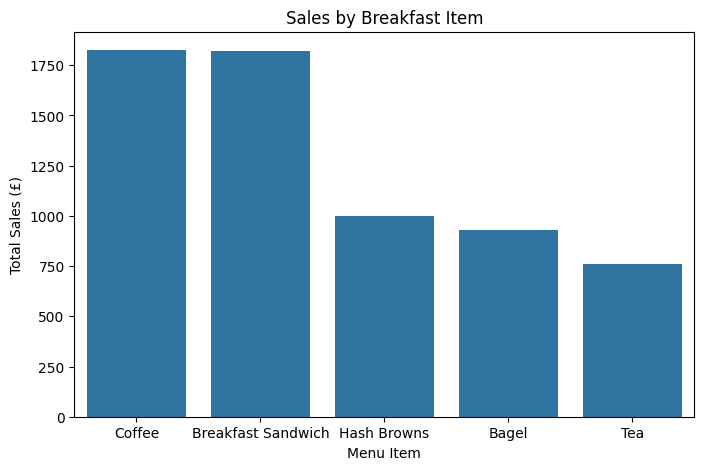

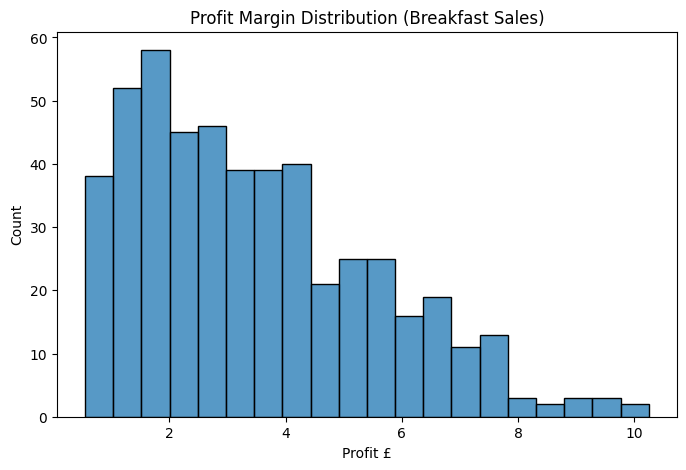

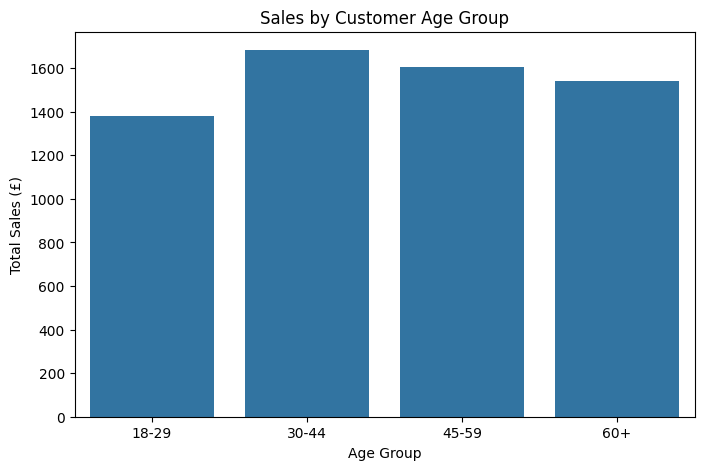

In [5]:
# 5a) Sales by item bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_item.index, y=sales_by_item["Sales"])
plt.title("Sales by Breakfast Item")
plt.ylabel("Total Sales (£)")
plt.xlabel("Menu Item")
plt.show()

# 5b) Profit margin distribution histogram
plt.figure(figsize=(8,5))
sns.histplot(df["ProfitMargin"], bins=20)
plt.title("Profit Margin Distribution (Breakfast Sales)")
plt.xlabel("Profit £")
plt.show()

# 5c) Demographics: Sales by age group
plt.figure(figsize=(8,5))
sns.barplot(data=sales_age, x="AgeGroup", y="Sales")
plt.title("Sales by Customer Age Group")
plt.ylabel("Total Sales (£)")
plt.xlabel("Age Group")
plt.show()

In [6]:
# 6a) Average price per item
avg_price = df.groupby("Item")["Price"].mean().sort_values()
avg_price

Item
Breakfast Sandwich    5.168831
Bagel                 5.213158
Hash Browns           5.243026
Coffee                5.323094
Tea                   5.758000
Name: Price, dtype: float64

In [7]:
# Save the dataset if needed
df.to_csv("tim_hortons_breakfast_dataset.csv", index=False)